In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

points = pd.read_excel('../data/sample_mask.txt.xlsx')

points

test_dat = points[points["Longitude"] >= -98]
test_dat = test_dat[test_dat["Longitude"] <= -90]
test_dat = test_dat[test_dat["Latitude"] >= -6]
test_dat = test_dat[test_dat["Latitude"] <= -1.5]

curve = pd.read_csv("../data/curv.xyz", sep="\t", names=["Longitude", "Latitude", "Intensity"])

test_curve = curve[curve["Longitude"] >= -98]
test_curve = test_curve[test_curve["Longitude"] <= -90]
test_curve = test_curve[test_curve["Latitude"] >= -6]
test_curve = test_curve[test_curve["Latitude"] <= -1.5]
test_curve

test_curve.plot(kind="hist", y="Intensity", density=True, bins=100)

curve["Longitude"].describe()

In [2]:
gravity = pd.read_csv("../data/grav.xyz", sep="\t", names=["Longitude", "Latitude", "Intensity"])
test_gravity = gravity[gravity["Longitude"] >= -98]
test_gravity = test_gravity[test_gravity["Longitude"] <= -90]
test_gravity = test_gravity[test_gravity["Latitude"] >= -6]
test_gravity = test_gravity[test_gravity["Latitude"] <= -1.5]

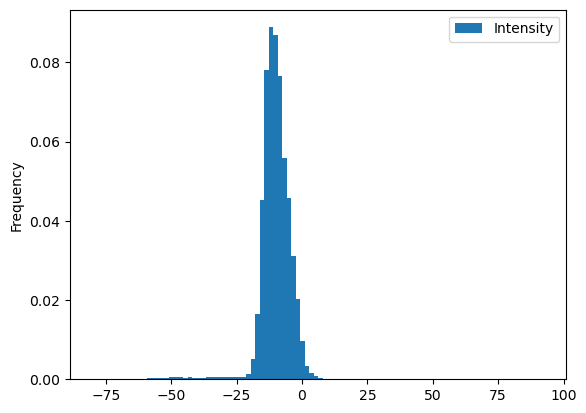

In [3]:
test_gravity.plot(kind="hist", y="Intensity", density=True, bins=100);

In [4]:
test_gravity[test_gravity["Intensity"] == test_gravity["Intensity"].min()]

,Longitude,Latitude,Intensity
105629353,-90.775,-1.508333,-79.972923


In [5]:
from polar_convert import polar_convert

x, y = polar_convert.polar_lonlat_to_xy(test_gravity["Longitude"], test_gravity["Latitude"], 70, 6371, 0.01671, 'south')

In [6]:
z = test_gravity["Intensity"].to_numpy()

In [7]:
zi, xi, yi = np.histogram2d(x, y, bins=(len(y), len(x)), weights=z)
zi = np.ma.masked_equal(zi, 0)

In [8]:
counts, _, _ = np.histogram2d(y, x, bins=(len(y), len(x)))

zi = zi/counts
zi = np.ma.masked_invalid(zi)

: 

In [8]:
zi

masked_array(
  data=[[--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --],
        ...,
        [--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --]],
  mask=[[ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        ...,
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True]],
  fill_value=0.0)